In [1]:
model_abb = {"bert-base-multilingual-uncased":"mbert",
            "xlm-roberta-base":"xlm_roberta",
            "xlm-roberta-large":"xlm_roberta_large",
        
        
                            "bert-base-uncased": "bert", 
                            "roberta-base": "roberta",
                            "roberta-large": "roberta_large",

                             "ClassCat/roberta-base-french": "french_roberta",
                             "dbmdz/bert-base-french-europeana-cased": "french_bert",

                             "dccuchile/bert-base-spanish-wwm-uncased": "BETO",
                             "PlanTL-GOB-ES/roberta-base-bne":"spanish_roberta",


                                }

In [2]:
from transformers import AutoTokenizer
import pandas as pd

/home/cass/anaconda3/envs/eva/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-06-12 16:20:23.954294: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-12 16:20:24.174437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 16:20:24.999522: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not 

In [3]:
english_data_list = ['sst', 'agnews', 'multirc']
hindi_data_list = ['hindi_xnli', 'hindi_bbc_nli', 'hindi_bbc_topic']
chinese_data_list = ['ChnSentiCorp', 'csl', 'ant']  # chinese_xnli csl
spanish_data_list = ['spanish_csl', 'spanish_paws', 'spanish_xnli']
french_data_list = ['french_csl', 'french_paws', 'french_xnli']

language_data_dict = {'English': english_data_list, 
                      'Hindi': hindi_data_list,
                      'Chinese': chinese_data_list,
                      'Spanish': spanish_data_list,
                      'French': french_data_list,
                      }

all_data_list = english_data_list+chinese_data_list+spanish_data_list+french_data_list+hindi_data_list

In [4]:
multi_model_list = ["bert-base-multilingual-uncased", "xlm-roberta-base"]
chinese_model_list = ["bert-base-chinese", "hfl/chinese-roberta-wwm-ext"]
hindi_model_list = ["l3cube-pune/hindi-bert-scratch", "flax-community/roberta-hindi"]
spanish_model_list = ["dccuchile/bert-base-spanish-wwm-uncased","PlanTL-GOB-ES/roberta-base-bne"]
french_model_list = ["dbmdz/bert-base-french-europeana-cased", "ClassCat/roberta-base-french"]
english_model_list = ["bert-base-uncased", "roberta-base"]
# 


chinese_query_list = ['csl', 'chinese_xnli', 'ant']
english_query_list = ['multirc']
french_query_list = ['french_paws'] # , 'french_xnli'
spanish_query_list = ['spanish_paws'] # , 'spanish_xnli'
hindi_query_list = ['hindi_bbc_nli'] # 'hindi_xnli', 



In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length = 512) 
text = tokenizer.tokenize('love baby cklx')

In [6]:
def get_split_num_roberta(tokenized_text):
    total_len = 0
    split_num = 0

    for i, item in enumerate(tokenized_text):

        if 'Ġ' in item:
            if item == 'Ġ': total_len-=1
            total_len +=1
            if i+1 == len(tokenized_text):
                pass
            else:
                if 'Ġ' not in tokenized_text[i+1]:
                    
                    #print(' split add one -->', item)
                    split_num += 1
                else: pass
    
    return split_num/(total_len+1)

In [ ]:
model_name = "PlanTL-GOB-ES/roberta-base-bne"
dataset = 'spanish_csl'

In [ ]:
testing_text_list = pd.read_csv(f'datasets/{dataset}/data/test.csv')['text']
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length = 517) 

In [ ]:
def get_split_num_mbert(tokenized_text):
    total_len = 0
    split_num = 0
    for i, item in enumerate(tokenized_text):
        
        if "##" in tokenized_text[i]:
            if "##" not in tokenized_text[i-1]:
                split_num += 1
        else: total_len +=1

    return split_num/total_len


In [ ]:
def get_split_num_xlmroberta(tokenized_text):
    total_len = 0
    split_num = 0
    for i, item in enumerate(tokenized_text):
        
        if "▁" in tokenized_text[i]:
            total_len += 1
            if i == len(tokenized_text)-1: pass
            else:
                if "▁" not in tokenized_text[i+1]:
                    split_num += 1
        else: pass

    return split_num/total_len

get_split_num_xlmroberta(text)

0.3333333333333333

In [ ]:
dataset = 'multirc'
model_name = "xlm-roberta-base" #"ClassCat/roberta-base-french" # "xlm-roberta-base"

testing_text_list = pd.read_csv(f'datasets/{dataset}/data/test.csv')['document'] # text document
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length = 517) 

split_ratio = 0
for i, t in enumerate(testing_text_list):
    tokenized_text = tokenizer.tokenize(t)
    split_ratio += get_split_num_xlmroberta(tokenized_text)

split_ratio = split_ratio/len(testing_text_list)
print(f"==>> split_ratio: {split_ratio}")

Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors


==>> split_ratio: 0.2733664665932335


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

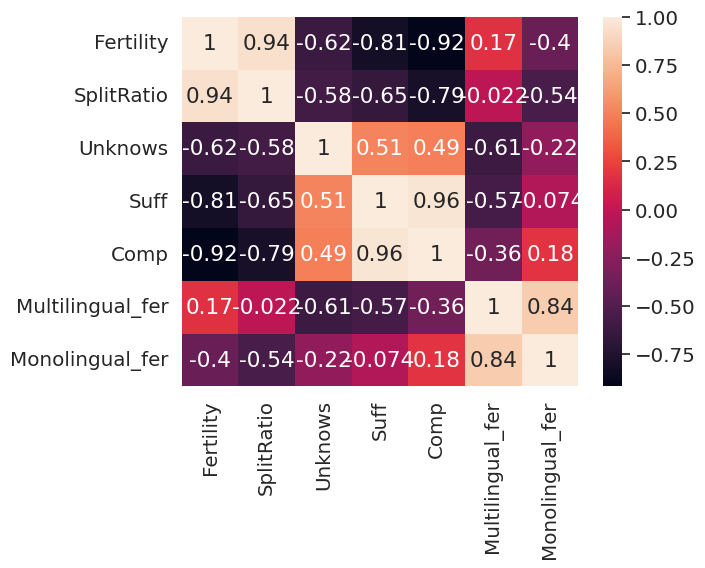

In [12]:
Fertility_Diff = [0.1946, 0.1189, 0.1861, 0.0640, 0.0864, 0.0054]

Splitting_Diff=[0.1846759353, 0.1035987293, 0.1135409675, 0.05206113183, 0.06209634727, 0.004828568685]

Suff_Diff = [-0.0629, -0.0389, -0.2094, 0.1031, 0.1228, 0.0834]

Comp_Diff =[-0.2782, -0.0917, -0.4618, 0.0788, 0.1681, 0.2022]

unk_Diff = [0, 197, 52.66666667, 610.3333333, 48.66666667, 279.6666667]

Multilingual_fer = [1.3194, 1.4086, 1.5309, 1.1791, 1.3694, 1.4612]

Monolingual_fer = [1.1249, 1.2897, 1.3448, 1.1151, 1.2830, 1.4559]

df = pd.DataFrame(list(zip(Fertility_Diff, Splitting_Diff, unk_Diff, Suff_Diff, Comp_Diff, Multilingual_fer, Monolingual_fer)), 
                  columns=['Fertility', 'SplitRatio', 'Unknows', 'Suff', 'Comp', 'Multilingual_fer', 'Monolingual_fer'])
sns.set(font_scale=1.3)
sns.heatmap(df.corr(), annot=True,)